In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib

#matplotlib.style.use("")


[ 0.63209082  0.66002548  0.89609117  0.6016945   0.03249364  0.6644668
  0.82867788  0.10632359  0.26932502  0.7853844   0.70812436  0.62983892
  0.33915408  0.21199643  0.02416378  0.75458798  0.10254536  0.2962611
  0.47941782  0.99752196  0.21525694  0.05689711  0.34135755  0.69324143
  0.58928107  0.40709121  0.76937159  0.77244666  0.99244137  0.5553661 ]


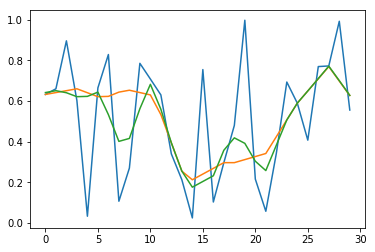

In [2]:
def smooth3s(x):
    if len(x) <= 2:
        return x
    y = np.empty_like(x)
    y[0], y[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y[j] = np.median(x[j-1:j+2])
    z = np.empty_like(y)
    z[0], z[-1] = (2*y[0]+y[1])/3, (2*y[-1]+y[-2])/3
    z[1:-1] = (y[1:-1] + y[:-2] + y[2:])/3
    return z

def smooth353(x):
    if len(x) <= 2:
        return x

    y3 = np.empty_like(x)
    y3[0], y3[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y3[j] = np.median(x[j-1:j+2])
        
    if len(y3) >= 5:
        y5 = np.empty_like(y3)
        y5[:2] = y3[:2]
        y5[-2:] = y3[-2:]
        for j in xrange(2,len(y3)-2):
            y5[j] = np.median(y3[j-2:j+3])
        y3[0], y3[-1] = y5[0], y5[-1]
        for j in xrange(1,len(x)-1):
            y3[j] = np.median(y5[j-1:j+2])

    return y3

def smooth353s(x):
    if len(x) < 3:
        return x
    
    x353 = smooth353(x)
    s = np.empty_like(x353)
    s[0], s[-1] = (2*x353[0]+x353[1])/3, (2*x353[-1]+x353[-2])/3
    s[1:-1] = (x353[1:-1] + x353[:-2] + x353[2:])/3
    
    return s
    

x= np.random.random((30,))
print x
plt.plot(x)
plt.plot(smooth353s(x))
plt.plot(smooth3s(x))

In [3]:
def plot(filename = "run_log.csv", limit=1000000, range=(-6.0, 6.0)):
    df=pd.read_csv(filename)
    x=df["rounds"].values
    n = len(x[x<=limit])
    x=x[:n]/1000
    y=df["reward_per_episode"].values[:n]
    loss=df["loss_ma"].values[:n]

    plt.figure(figsize=(13,6))

    plt.subplot(121)
    plt.plot(x,y, ls="None", marker=".", color="gray")
    plt.plot(x,smooth353s(y), color="k")
    plt.ylim(*range)
    plt.ylabel("Episode reward")
    plt.xlabel("Training steps, x1000")
    plt.grid()

    plt.subplot(122)
    plt.plot(x, loss, ls="None", marker=".", color="k")
    plt.plot(x, smooth353s(loss), color="k")
    plt.ylim(0.0, 0.2)
    plt.grid()
    plt.ylabel("Loss moving average")
    plt.xlabel("Training steps, x1000")
    
    
def plot_many(filenames, labels, limit=700000, r_range=(-6,6), l_range=(0, 10)):
    colors = ['c','g','b','m','k','r']
    colors = ['k','C1','C2','C3','C4','C5','C6']
    rewards = {}
    errors = {}
    t = {}
    for fn in filenames:
        df = pd.read_csv(fn)
        r = df["rounds"].values
        n = len(r[r<=limit])
        #print n
        t[fn] = df["rounds"].values[:n]/1000.0
        rewards[fn] = df["reward_per_episode"].values[:n]
        errors[fn] = df["loss_ma"].values[:n]
        
    plt.figure(figsize=(13,6))
    plt.subplot(121)
    plt.ylim(*r_range)
    plt.grid()

    for i, fn in enumerate(filenames):
        plt.plot(t[fn], rewards[fn], color=colors[i], linestyle=' ', marker=".")
        plt.plot(t[fn],smooth353s(rewards[fn]), color=colors[i], label=labels[i])
    plt.legend()
    plt.ylabel("Episode reward")
    plt.xlabel("Training steps, x1000")

    plt.subplot(122)
    plt.ylim(*l_range)
    plt.grid()
    for i, fn in enumerate(filenames):
        plt.plot(t[fn], errors[fn], color=colors[i], linestyle=' ', marker=".")
        plt.plot(t[fn],smooth353s(errors[fn]), color=colors[i], label=labels[i])
    plt.legend()
    plt.ylabel("Loss moving average")
    plt.xlabel("Training steps, x1000")
    
    

Base:
- Gamma = 0.99
- Weight = 0.5
- Kind = diff2
- Environment: cartpole with 500 steps limit
    - Rewards:
       - per turn: 0
       - fall: -1
       - no fall in 500 steps: +1
- Model:

```
--- trainable model summary ---
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
x0 (InputLayer)                 (None, Dimension(4)) 0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 2)            3272        x0[0][0]                         
__________________________________________________________________________________________________
mask (InputLayer)               (None, Dimension(2)) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           model_1[1][0]                    
                                                                 mask[0][0]                       
==================================================================================================
Total params: 3,272
Trainable params: 3,272
Non-trainable params: 0
```


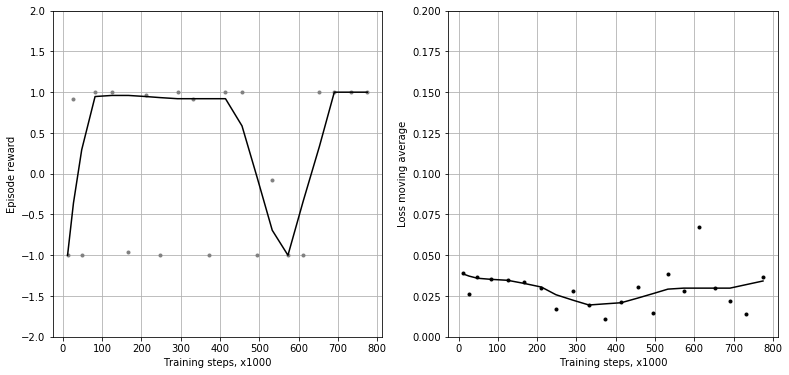

In [5]:
plot("run_log.csv",
    range=(-2,2.0))

Weight = 0.7

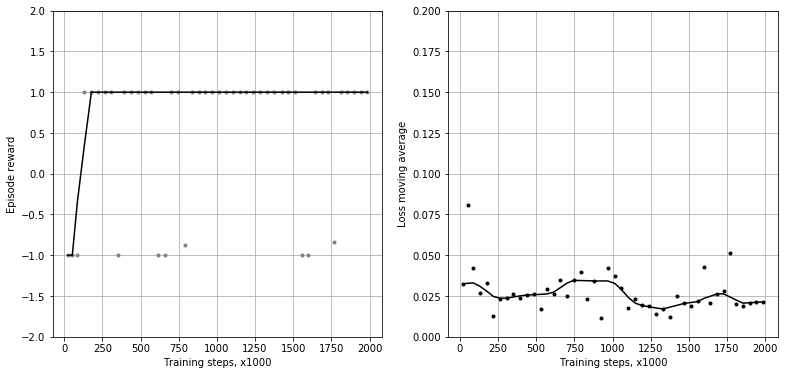

In [35]:
plot("logs/diff2.csv",
    range=(-2,2.0), limit=2000000)

Kind: double
Soft update: 0.01

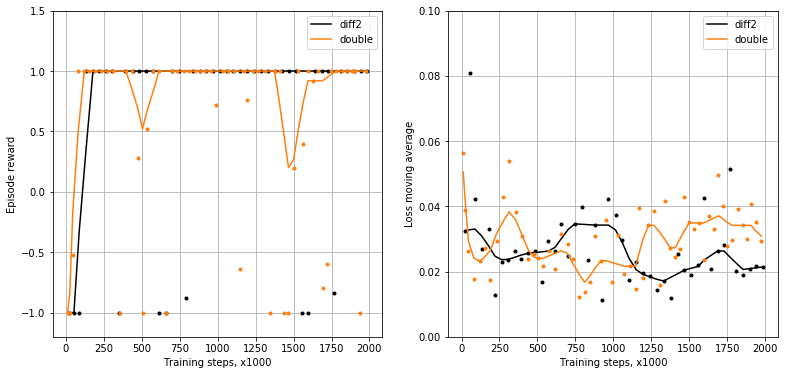

In [46]:
plot_many(["logs/diff2.csv","run_log.csv"],["diff2","double"],
    r_range=(-1.2,1.5), l_range=(0,0.1), limit=2000000)

- Environment: cartpole with 500 steps limit
    - Rewards:
       - per turn: 1
       - fall: 0
       - no fall in 500 steps: 0


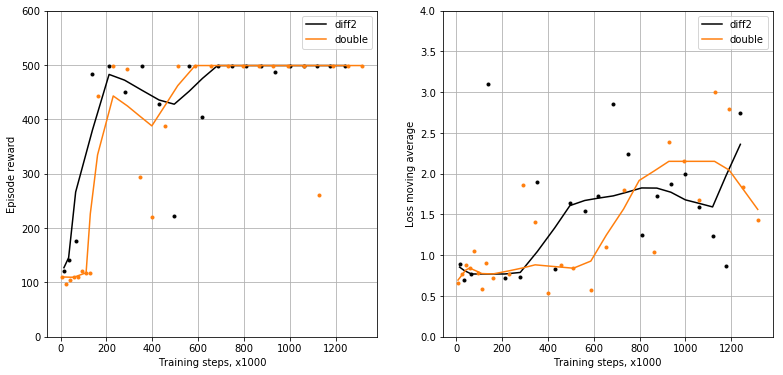

In [77]:
plot_many(["logs/run_diff2_rewards_every_turn.csv","logs/run_double_rewards_every_turn.csv"],
          ["diff2","double"],
    r_range=(0,600), l_range=(0,4), limit=2000000)

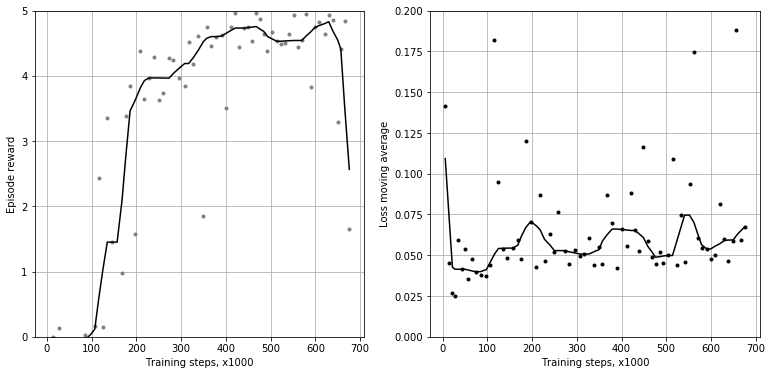

In [20]:
plot("../tanks_target/run_log.csv", limit=3000000,
    range=(0,5))

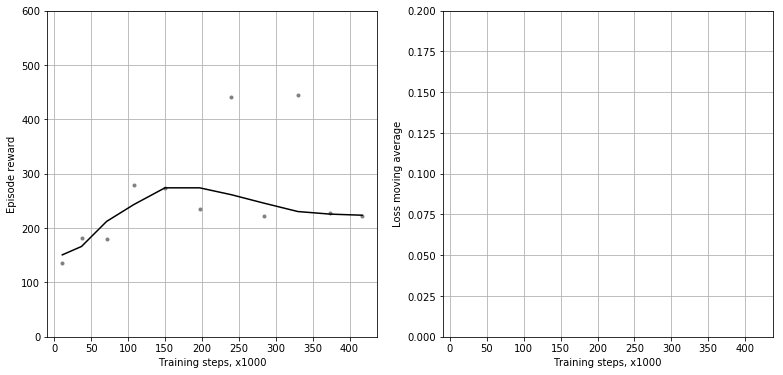

In [93]:
plot("/Users/igorvm/Projects/RL-keras/tests/cartpole/run_log.csv", range=(0,600))